In [2]:
# imports
import numpy as np
import random
from math import comb
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


In [14]:
from qiskit_finance.circuit.library.probability_distributions.normal import (
    NormalDistribution,
)

z_max = 3
n_z = 6

p = NormalDistribution(
    n_z,
    0,
    1,
    bounds=(-z_max, z_max),
).probabilities

In [15]:
len(p)

64

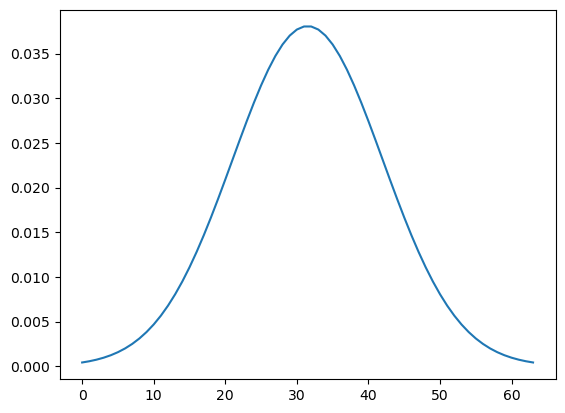

In [16]:
import matplotlib.pyplot as plt

plt.plot(p)
plt.show()

In [ ]:
# Deconvolution using Polynomial Factoring
def find_roots(coeffs):
    return np.polynomial.polynomial.polyroots(coeffs)


def group_roots(roots):
    comp_root_real_pos = np.array([])
    comp_root_real_neg = np.array([])
    real_root = np.array([])

    for i in roots:
        if (np.isreal(i)):
            real_root = np.append(real_root, i)
        elif (np.real(i) >= 0):
            comp_root_real_pos = np.append(comp_root_real_pos, i)
        elif (np.real(i) < 0):
            comp_root_real_neg = np.append(comp_root_real_neg, i)

    return comp_root_real_pos, comp_root_real_neg, real_root


def find_conjugate_pairs(arr):
    conjugate_pairs = []
    n = len(arr)
    used = set()  # To track indices of elements already paired

    for i in range(n):
        if i in used:
            continue
        for j in range(i + 1, n):
            if j in used:
                continue
            # Check if arr[j] is the conjugate of arr[i]
            if arr[i] == np.conj(arr[j]):
                conjugate_pairs.append([arr[i], arr[j]])
                used.update([i, j])
                break

    return np.array(conjugate_pairs)


def list_of_factors(p):
    # find roots of p
    r = find_roots(p)

    # group roots of p
    pos, neg, real = group_roots(r)

    # generate 1
    pos = np.sort(pos)
    basket1 = list(find_conjugate_pairs(pos))

    # generate basket 2
    neg_paired = find_conjugate_pairs(neg)
    basket2 = list(neg_paired)
    basket2.append(np.array([real]))
    random.shuffle(basket2)

    # processed_baskets = []
    # while len(basket1) > 0:
    #     temp_array = basket1.pop(0)  # Pop the first element from basket1
    #     temp_boolean = True
    #     while temp_boolean and basket2:
    #         random_index = random.randint(0, len(basket2) - 1)
    #         temp_array.append(basket2.pop(random_index))  # Pop the element at random_index from basket2
    #         print(temp_array)
    #         poly_coeff = np.poly(temp_array)
    #         if any(c.real <= 0 for c in poly_coeff):
    #             temp_boolean = False
    #         else:
    #             processed_baskets.append(temp_array)
    #             temp_array = [basket1.pop(0)] if basket1 else []


    while len(basket1) > 0:
        temp_array = basket1[0]
        temp_boolean = True

        while temp_boolean and basket2:
            random_index = random.randint(0, len(basket2) - 1)
            temp_array = np.append(temp_array, basket2[random_index])
            poly_coeff = np.poly(temp_array)
            basket2.pop(random_index)

            if any(c.real <= 0 for c in poly_coeff):
                temp_boolean = True
            else:
                temp_boolean = False

        basket2.append(temp_array)
        basket1.pop(0)


    list_of_poly_factors = []
    for i in basket2:
        temp = np.poly(i)
        list_of_poly_factors.append(temp / np.sum(temp))

    return list_of_poly_factors


def generate_factorizations(p):
    list_of_factorizations = []
    for i in range(1000):
        list_of_factorizations.append(list_of_factors(p))
        print(str(i) + ", " + str(len(list_of_factorizations[i])))
    
    list_of_factorizations = sorted(list_of_factorizations, key=lambda x: len(x), reverse = True)

    return list_of_factorizations

def generate_q1_q2(list_of_factorizations):
    
    max_factors = len(list_of_factorizations[0])
    print("max factors: " + str(max_factors))
    
    list_of_max_factorized = []
    i = 0
    while i < len(list_of_factorizations) and len(list_of_factorizations[i]) == max_factors:
        list_of_max_factorized.append(list_of_factorizations[i])
        i += 1
    
    for i in range(len(list_of_max_factorized)):
        list_of_max_factorized[i] = sorted(list_of_max_factorized[i], key=lambda x: len(x), reverse=True)
    
    best_factorized = min(list_of_max_factorized, key=lambda x: len(x[0]))
    
    # print(len(list_of_max_factorized))
    # print(list_of_max_factorized)
    # print(best_factorized)
    
    q1 = best_factorized[0]
    q2 = [1]
    for i in range(1, len(best_factorized)):
        q2 = np.polymul(best_factorized[i], q2)
    
    # print(q1)
    # print(q2)

    return q1, q2

list_of_factorizations = generate_factorizations(p)
print(list_of_factorizations)

q1, q2 = generate_q1_q2(list_of_factorizations)

In [18]:
print(q1)
print(q2)

print((len(q1), len(q2)))

[0.00206449 0.00063361 0.00207354 0.00142066 0.00133044 0.00215244
 0.00364044 0.00351982 0.00638264 0.00566785 0.0070328  0.00816383
 0.00944121 0.01118266 0.01469927 0.0150551  0.01848591 0.01941968
 0.02124718 0.02384222 0.02670819 0.02824618 0.03228318 0.03234401
 0.03449488 0.03558336 0.03647652 0.03761771 0.03963341 0.0383135
 0.03963341 0.03761771 0.03647652 0.03558336 0.03449488 0.03234401
 0.03228318 0.02824618 0.02670819 0.02384222 0.02124718 0.01941968
 0.01848591 0.0150551  0.01469927 0.01118266 0.00944121 0.00816383
 0.0070328  0.00566785 0.00638264 0.00351982 0.00364044 0.00215244
 0.00133044 0.00142066 0.00207354 0.00063361 0.00206449]
[0.20491869 0.20856235 0.08651896 0.08651896 0.20856235 0.20491869]
(59, 6)


In [19]:
np.polymul(q1, q2) - p

array([-6.80851859e-15, -9.00809375e-15, -1.18304888e-14, -1.53693247e-14,
       -1.97667403e-14, -2.51166275e-14, -3.14527050e-14, -3.87628298e-14,
       -4.68574832e-14, -5.55584224e-14, -6.44042111e-14, -7.30413993e-14,
       -8.09925044e-14, -8.79157858e-14, -9.32500605e-14, -9.66310365e-14,
       -9.73127828e-14, -9.48113116e-14, -8.82835471e-14, -7.69939668e-14,
       -6.10379802e-14, -4.03774236e-14, -1.56298585e-14,  1.22159227e-14,
        4.16749968e-14,  7.15608128e-14,  1.00634778e-13,  1.28189126e-13,
        1.53099755e-13,  1.74256443e-13,  1.90736316e-13,  2.01658135e-13,
        2.06223927e-13,  2.03732864e-13,  1.93962901e-13,  1.77566295e-13,
        1.55597757e-13,  1.29549149e-13,  1.00870701e-13,  7.10230486e-14,
        4.11753964e-14,  1.23581700e-14, -1.43045298e-14, -3.81049359e-14,
       -5.85989590e-14, -7.47908679e-14, -8.63753513e-14, -9.35015954e-14,
       -9.62615404e-14, -9.49709061e-14, -9.04849112e-14, -8.36223452e-14,
       -7.52705190e-14, -

In [ ]:
# def prepareRegister(f1, f2, n, circuit):
#     #require that these functions are of the same length
    
#     circuit.initalize(f1, [x for x in range(0, n)])
#     circuit.initalize(f2, [x for x in range(n, 2*n)])

In [ ]:
amplitudes_q1 = np.sqrt(q1)
amplitudes_q2 = np.sqrt(q2)

n1 = int(np.ceil(np.log2(np.floor((len(p) + 1)/ 2))))
n2 = int(np.ceil(np.log2(np.ceil((len(p) + 1)/ 2))))

print(n1)
print(n2)

if n1 > n2:
    temp = amplitudes_q1
    amplitudes_q1 = amplitudes_q2
    amplitudes_q2 = temp

    temp2 = n1
    n1 = n2
    n2 = temp2


amplitudes_q1.resize(2 ** n2)
amplitudes_q2.resize(2 ** n2)

print(amplitudes_q1)
print(amplitudes_q2)

qr0 = QuantumRegister(n2, 'qr0')
qr1 = QuantumRegister(n2, 'qr1')
anc = QuantumRegister(n2, "anc")
cr = ClassicalRegister(n2, "cr")

circuit = QuantumCircuit(qr0, qr1, anc, cr)

circuit.initialize(amplitudes_q1, [x for x in range(0, n2)])
circuit.initialize(amplitudes_q2, [x for x in range(n2, 2*n2)])
# prepareRegister(amplitudes_q1, amplitudes_q2, n, circuit)


circuit.decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose().draw('mpl') 

In [21]:
def quantum_adder(qc, phi_1, phi_2, ancilla, cr, n):
    # Create Quantum Registers for the input states and ancilla qubits
    #phi_1 = QuantumRegister(n, 'phi1')
    #phi_2 = QuantumRegister(n, 'phi2')
    #ancilla = QuantumRegister(n, 'ancilla')

   
    # Create a Quantum Circuit with the registers
    #qc = QuantumCircuit(phi_1, phi_2, ancilla)
   
    # Apply CCX gates (Toffoli gates) as per the pseudo code
    for i in range(n):
        qc.ccx(phi_1[i], phi_2[i], ancilla[i])
   
    # Apply CX gates (CNOT gates) as per the pseudo code
    for i in range(n):
        qc.cx(phi_1[n-i-1], phi_2[n-i-1])
   
    # Apply CCX gates with control qubits from phi_2 and ancilla, target to ancilla
    for i in range(1, n):
        qc.ccx(phi_2[i], ancilla[i-1], ancilla[i])
   
    # Apply CX gates with control qubits from ancilla, target to phi_2
    for i in range(n-1):
        qc.cx(ancilla[i], phi_2[i+1])
   
   
    # Measure the second register (phi_2) to get the result of addition
    qc.measure(phi_2, cr)
   
    # Return the quantum circuit
    return qc



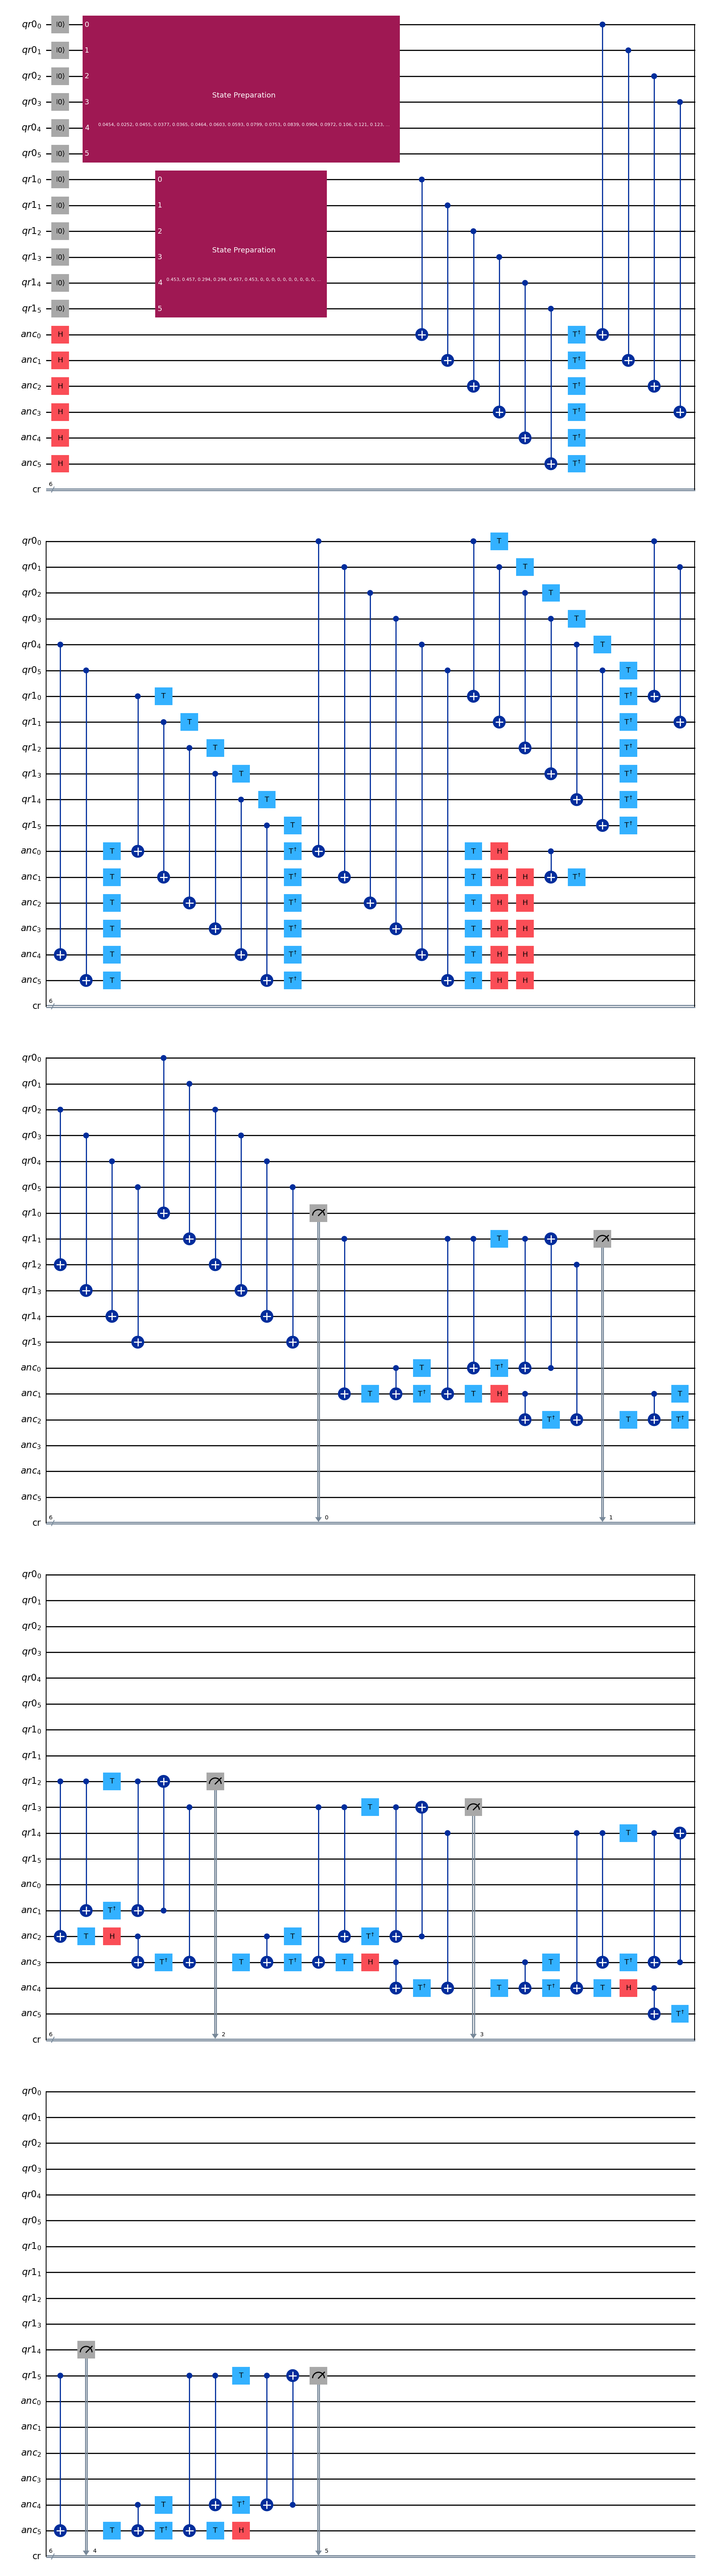

In [22]:
quantum_adder(circuit, qr0, qr1, anc, cr, n2)

circuit.decompose().draw('mpl') 

In [23]:
from pytket.extensions.qiskit import qiskit_to_tk
from pytket.circuit.display import render_circuit_jupyter

tket_circuit = qiskit_to_tk(circuit)
render_circuit_jupyter(tket_circuit)

In [25]:
from pytket.transform import Transform
Transform.DecomposeBoxes().apply(tket_circuit)

render_circuit_jupyter(tket_circuit)

tket_circuit.depth()

129

In [26]:
from pytket.extensions.nexus import Nexus
from datetime import datetime

nexus = Nexus()
my_project = nexus.new_project()


New project created: project-pliable-ruby-haunting-citrinopileatus


In [27]:
from pytket.extensions.nexus import QuantinuumConfig


configuration = QuantinuumConfig(device_name="H1-1LE")

In [28]:
from pytket.extensions.nexus import NexusBackend

# Then we'll create a NexusBackend using our config and the project we created
backend_LE = NexusBackend(configuration, project=my_project)

compiled_circ_Hseries_LE = backend_LE.get_compiled_circuit(tket_circuit, optimisation_level = 2)


Started using project with name: project-pliable-ruby-haunting-citrinopileatus


In [29]:
handle_LE =  backend_LE.process_circuit(compiled_circ_Hseries_LE, n_shots=1024)
print(backend_LE)

In [30]:
status = backend_LE.circuit_status(handle_LE)
print(status)

CircuitStatus(status=<StatusEnum.RUNNING: 'Circuit is running.'>, message='Circuit is running in a simulator.', error_detail=None, completed_time=None, queued_time=None, submitted_time=datetime.datetime(2024, 4, 14, 14, 7, 6, 864941, tzinfo=datetime.timezone.utc), running_time=None, cancelled_time=None, error_time=None, queue_position=None)


In [31]:
from pytket.extensions.qiskit import AerBackend
aer_b = AerBackend()

n_shots = 1024

handle = aer_b.process_circuit(tket_circuit, n_shots=n_shots, seed=1)
counts = aer_b.get_result(handle).get_counts()

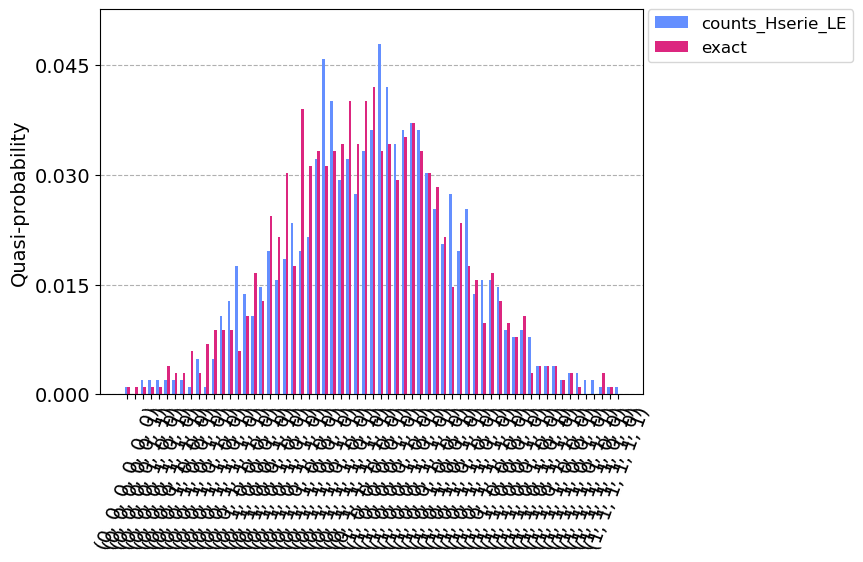

In [32]:
from qiskit.visualization import plot_distribution


result_LE = backend_LE.get_result(handle_LE)
counts_Hserie_LE = result_LE.get_counts()


# Note: state basis numbers in Qiskit and pytket are switched, hence need to be corrected to use the plot_distribution function
counts_Hserie_LE = {key[::-1]: value for key, value in counts_Hserie_LE.items()}
counts_exact = {key[::-1]: value for key, value in counts.items()}

# Now plot the results
plot_distribution(
    [counts_Hserie_LE, counts_exact], legend=["counts_Hserie_LE", "exact"], bar_labels=False
)

2209.0


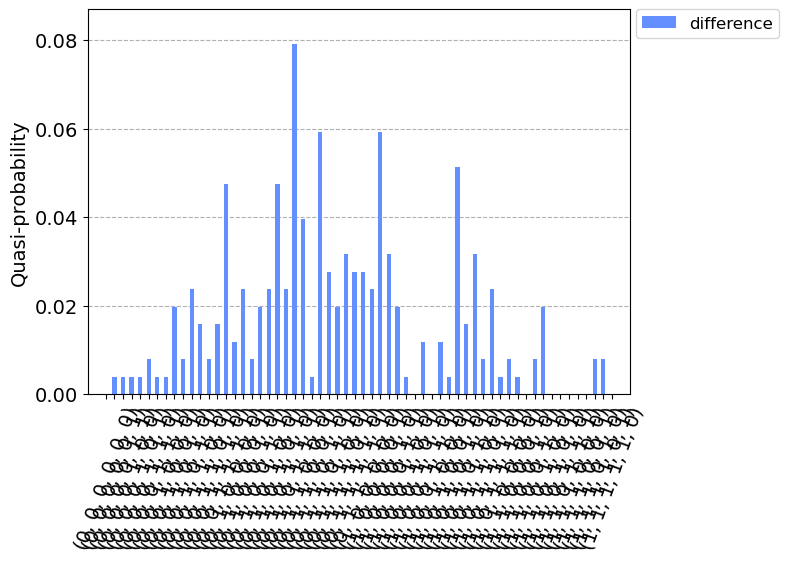

In [33]:
# counts_exact - counts_Hserie_LE

res = {key: abs(counts_exact[key] - counts_Hserie_LE.get(key, 0)) / n_shots
                       for key in counts_exact.keys()}

print( sum ((np.array(list(res.values())) * n_shots )**2 ))

plot_distribution(
    [res], legend=["difference"], bar_labels=False
)